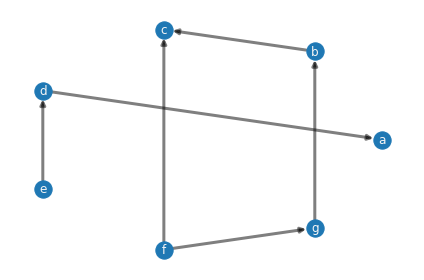

In [1]:
from numpy import genfromtxt
import string
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def Etiquetas(matz):
    letr = list(string.ascii_lowercase)
    etiqs = {}
    i = 0
    for l in letr[: matz.shape[1]]:
        etiqs[i] = l
        i += 1

    return etiqs

def LeeGrafica(nomcsv):
    datos = genfromtxt(nomcsv, delimiter=',')
    return datos

def MuestraDiGrafica(matz, etiqs, poss):
    nds = matz.shape[1]
    eds = matz.shape[0]

    _, cols = np.where(matz == 1)
    _, colsn = np.where(matz == -1) 
    edges = list(zip(cols.tolist(), colsn.tolist())) 

    Dg = nx.DiGraph()
    Dg.add_nodes_from(poss.keys())
    Dg.add_edges_from(edges)
    nx.draw_networkx_nodes(Dg, poss)
    nx.draw_networkx_edges(Dg, poss, width=3.0, alpha=0.5)
    nx.draw_networkx_labels(Dg, poss, etiqs, font_size=12, font_color="whitesmoke")

    plt.tight_layout()
    plt.axis("off")
    plt.show()


def PosRegular(nds):
    poss = {}
    
    r = 1
    for i in range(nds):
        x = r* np.cos(2*np.pi*i/nds)
        y = r* np.sin(2*np.pi*i/nds)
        poss[i] = (x, y)

    return poss

MInc = LeeGrafica("graficas\\matriz2.csv")
Etq = Etiquetas(MInc)
MuestraDiGrafica(MInc, Etq, PosRegular(MInc.shape[1]))
